In [0]:
import cv2
import numpy as np
import glob, os
from google.colab.patches import cv2_imshow

images = glob.glob('*.jpg')
print(images)


['WIN_20190911_17_47_14_Pro.jpg', 'WIN_20190911_17_46_39_Pro.jpg', 'WIN_20190911_17_47_08_Pro.jpg', 'WIN_20190911_17_46_44_Pro.jpg', 'WIN_20190911_17_46_41_Pro.jpg', 'WIN_20190911_17_47_06_Pro.jpg', 'WIN_20190911_17_47_02_Pro.jpg', 'WIN_20190911_17_47_09_Pro.jpg', 'WIN_20190911_17_46_50_Pro.jpg', 'WIN_20190911_17_47_10_Pro.jpg', 'WIN_20190911_17_47_12_Pro.jpg', 'WIN_20190911_17_46_52_Pro.jpg', 'WIN_20190911_17_46_54_Pro.jpg', 'WIN_20190911_17_46_57_Pro.jpg', 'WIN_20190911_17_47_00_Pro.jpg']


In [0]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = (np.mgrid[0:9,0:6].T.reshape(-1,2))

objpoints = [] 
imgpoints = [] 

print(images)
# files = os.listdir(images)
for fname in images:
  img = cv2.imread(fname)
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

  # print(fname);
  if ret==True:
    objpoints.append(objp)

    corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)

        # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (9,6), corners2,ret)
    cv2_imshow(img)
    cv2.waitKey(50)
  # break;

In [0]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (640, 480),None,None)

In [0]:
mean_error = 0
re_pro_error = []
for i in range(len(objpoints)):
    imgpoints2, _fff = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    re_pro_error.append(error)
    mean_error += error
    # break;
print ("total error: ", mean_error/len(objpoints))

total error:  0.04630479774787469


In [0]:
mtx

array([[542.89340567,   0.        , 316.35246844],
       [  0.        , 547.30948109, 220.837035  ],
       [  0.        ,   0.        ,   1.        ]])

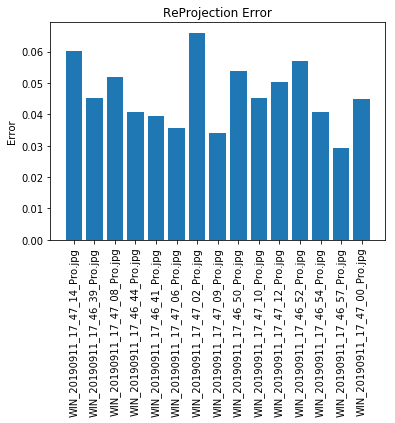

In [0]:
import matplotlib.pyplot as plt

# print(len(re_pro_error))

plt.bar(range(1,16), re_pro_error)
plt.ylabel('Error')
plt.xticks(range(1,16), images, rotation='vertical')
plt.title("ReProjection Error")
plt.show()

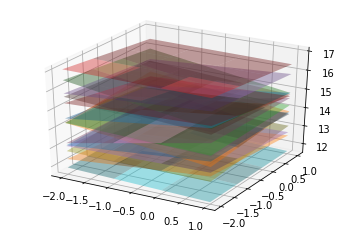

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

point2 = np.array([10, 50, 50])
# rvecs2 = np.array(rvecs)*180/np.pi
# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
# d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(-2,2,1), range(-2,2,1))

# calculate corresponding z
# z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
# plt3d.plot_surface(xx, yy, z, alpha=0.2)

# print(len(rvecs))
for i in range(15):
  # if i == 6:
  #   continue
  # normal = rvecs2[i,:,0]
  normal = np.matmul(cv2.Rodrigues(rvecs[i])[0],[(0),(0),(1)])
#   x = cos(yaw)cos(pitch)
# y = sin(yaw)cos(pitch)
# z = sin(pitch)
  # normal[0] = np.cos()
  d = -np.sqrt((tvecs[i][0]*tvecs[i][0]) + (tvecs[i][1]*tvecs[i][1]) + (tvecs[i][2]*tvecs[i][2]))
#   z = np.zeros([21,21])
#   z[-2:3,-2:3] = (-normal[0] * xx[-2:3,-2:3] - normal[1] * yy[-2:3,-2:3] - d) * 1. /normal[2]
  z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
  plt3d.plot_surface(xx, yy, z, alpha=0.4)
#   break;
#and i would like to plot this point : 
# ax.scatter(point2[0] , point2[1] , point2[2],  color='green')

plt.show()